<a href="https://colab.research.google.com/github/K44Ll/Machine-Learning/blob/master/Arquitetura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definindo arquitetura


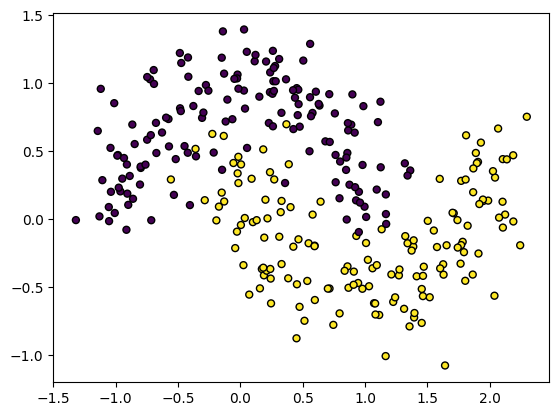

In [4]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X1, Y1 = make_moons(n_samples=300, noise=0.2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o',c=Y1, s=25, edgecolor='k')

## nn.sequential

In [2]:
import torch
from torch import nn

input_size = 2
output_size = 1
hidden_size = 8

net = nn.Sequential(nn.Linear(in_features=input_size, out_features=hidden_size),# Hidden
                    nn.ReLU(),# ativação nao linear
                    nn.Linear(in_features=hidden_size, out_features=output_size))# output
print(net)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


torchsummary

In [ ]:
from torchsummary import summary
summary(net, (1, input_size))

## Foward

In [ ]:
print(X1.shape)
tensor = torch.from_numpy(X1).float()
pred = net(tensor)
print(pred.size())

## nn.Module

In [5]:
class rede(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(rede, self).__init__()
    # definir arquitetura
    self.hidden = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.output = nn.Linear(hidden_size, output_size)
  def forward(self, X): # Changed 'foward' to 'forward'
      hidden = self.relu(self.hidden(X)) # Gera uma saída pelo X
      output = self.output(hidden)
      return output

Instanciando a rede

In [ ]:
input_size = 2
output_size = 1
hidden_size = 8

net = rede(input_size, hidden_size, output_size)
print(net)

Foward

In [ ]:
print(X1.shape)
tensor = torch.from_numpy(X1).float()
pred = net(tensor)
print(pred.size())

# Subindo as infos para a GPU

In [7]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')
print(device)

cuda


In [8]:
input_size = 2
output_size = 1
hidden_size = 8

net = rede(input_size, hidden_size, output_size)
net = net.to(device)
print(net)

rede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


In [11]:
print(X1.shape)
tensor = torch.from_numpy(X1).float()
tensor = tensor.to(device)
pred = net(tensor)
print(pred.size())

(300, 2)
torch.Size([300, 1])
